<a href="https://colab.research.google.com/github/sskboonmee/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
pizza = pd.read_csv('/content/Pizza.csv' )
pizza

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [67]:
pizza.shape    #ตรวจสอบขนาดของข้อมูลพบว่ามี Data 300 ตัวและมี 9 Dimension

(300, 9)

#### Plot scatter matrix เพื่อดูการกระจายตัวของ Data 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb31e18e0d0>,
      dtype=object)

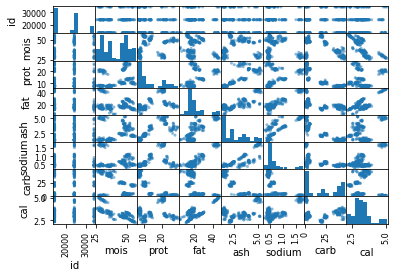

In [66]:
pd.plotting.scatter_matrix(pizza)

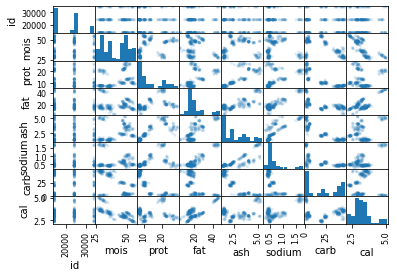

In [64]:
pd.plotting.scatter_matrix(pizza , alpha=0.15);

#####ตัด Dimension ที่เป็นตัวอักษรออกไป ให้เหลือเฉพาะข้อมูลที่เป็นตัวเลข

In [78]:
pizza.iloc[:,2:]    

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


#### นำมาเท่ากับตัวแปรตัวใหม่เพื่อจะใช้ต่อได้

In [80]:
newpizza = pizza.iloc[:,2:]    
newpizza.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


####ตรวจสอบว่าระหว่าง Column มี Correlation กันมากน้อยแค่ไหนด้วย numpy

In [85]:
corr = np.corrcoef(newpizza.to_numpy().T)

In [86]:
corr.shape

(7, 7)

In [87]:
corr   #เป็นการดู correlation จุดที่ขึ้น 1 คือเป็นแบบข้อมูลตัวมันเองเทียบกับข้อมูลมันเอง ซึ่งมันก็คือข้อมูลของตัวมันเองอยู่แล้ว 

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [88]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} <=> column = {j} corrcoef = {corr[i,j]}')    
            #ไม่มี correlation ซ้ำกัน จึงไม่ต้องลบ data ที่มันซ้ำกันออก

####ตัด dimension ที่ไม่ใช้ออก

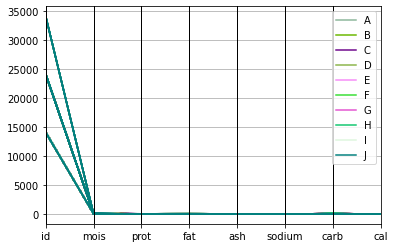

In [109]:
pd.plotting.parallel_coordinates(pizza,'brand')

In [107]:
pizza_dropped = pizza.drop(['brand','id'],axis=1)  
pizza_dropped

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [108]:
pizza_dropped1 = pizza.drop(['id'],axis=1)  
pizza_dropped1

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


####กราฟ parallel coordinate

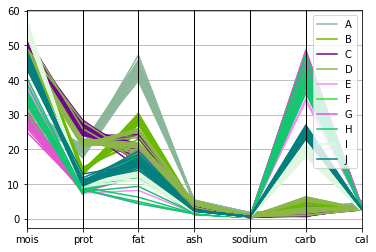

In [111]:
pd.plotting.parallel_coordinates(pizza_dropped1,'brand',cols=['mois','prot','fat','ash','sodium','carb','cal'])

####ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล

In [112]:
from sklearn.decomposition import PCA